<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Segunda (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 22/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Tópico 0">Questão 1</a></li>
        <li><a href="#Tópico 1">Questão 2</a></li>
        <li><a href="#Tópico 2">Questão 3</a></li>
        <li><a href="#Tópico 3">Questão 4</a></li>

</ol>
</div>


<div id="Tópico 0">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 1:</h></a></h>   Implemente uma estratégia de trade automático baseado em duas médias móveis e verifique o desempenho quanto ao Índice Sharpe. Utilize um período mínimo de 3 anos e os 5 (cinco) ativos escolhidos na primeira avaliação.
 
</div> </div> </div> 


In [33]:
from utils import *
import matplotlib.dates as mdates


In [51]:
ticker_list = ['USIM5.SA', 'GOAU4.SA', 'ENBR3.SA','ELET3.SA', 'BRML3.SA']
all_data = get_tickers(ticker_list,
                       startdate=(datetime.datetime.today() - datetime.timedelta(days=365*3)) )

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 2:</h></a></h>  Implemente uma estratégia de trade automático baseado em duas médias móveis anterior, adicionando à aplicação o RSI ou MACD. Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.
  
</div> </div> 

In [60]:
open_values = all_data.reset_index().pivot('Date', 'Ticker', 'Open')
high_values = all_data.reset_index().pivot('Date', 'Ticker', 'High')
low_values = all_data.reset_index().pivot('Date', 'Ticker', 'Low')
close_values = all_data.reset_index().pivot('Date', 'Ticker', 'Close')

def ema(data, period=0, column='Close'):
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()    
    return data

def macd(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    remove_cols = []
    if not 'ema' + str(period_long) in data.columns:
        data = ema(data, period_long)
        remove_cols.append('ema' + str(period_long))

    if not 'ema' + str(period_short) in data.columns:
        data = ema(data, period_short)
        remove_cols.append('ema' + str(period_short))

    data['macd_val'] = data['ema' + str(period_short)] - data['ema' + str(period_long)]
    data['macd_signal_line'] = data['macd_val'].ewm(ignore_na=False, min_periods=0, com=period_signal, adjust=True).mean()

    data = data.drop(remove_cols, axis=1)
        
    return data

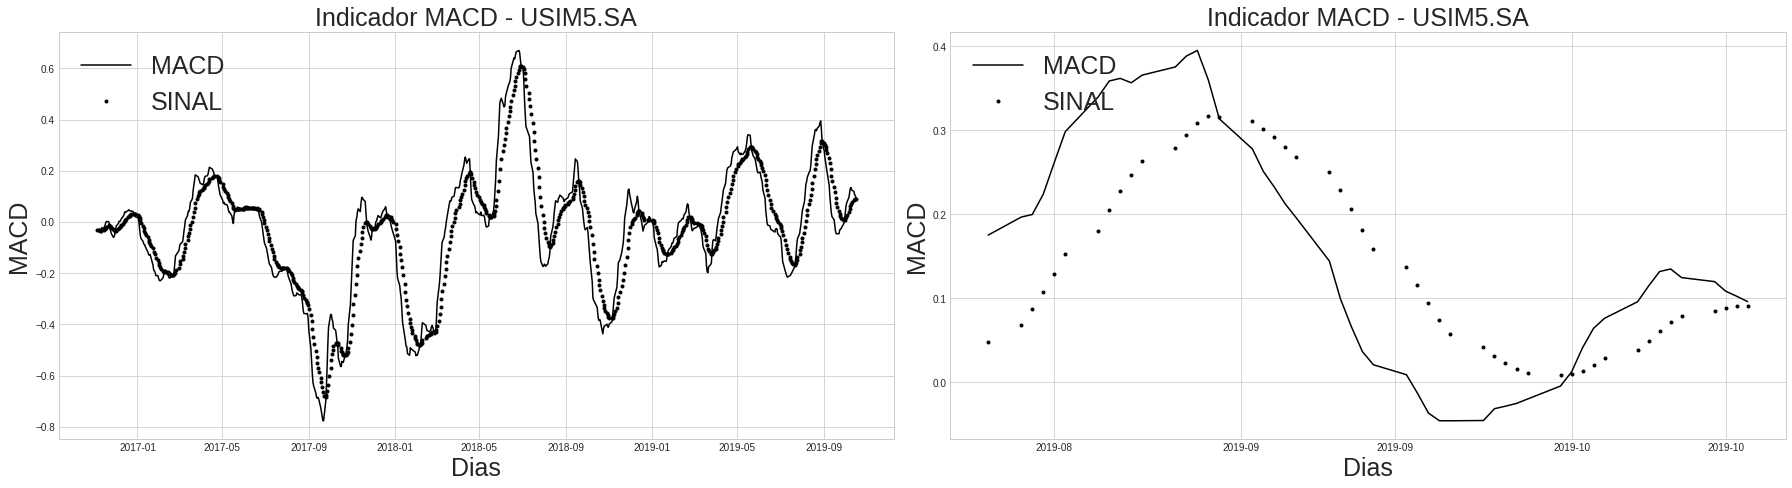

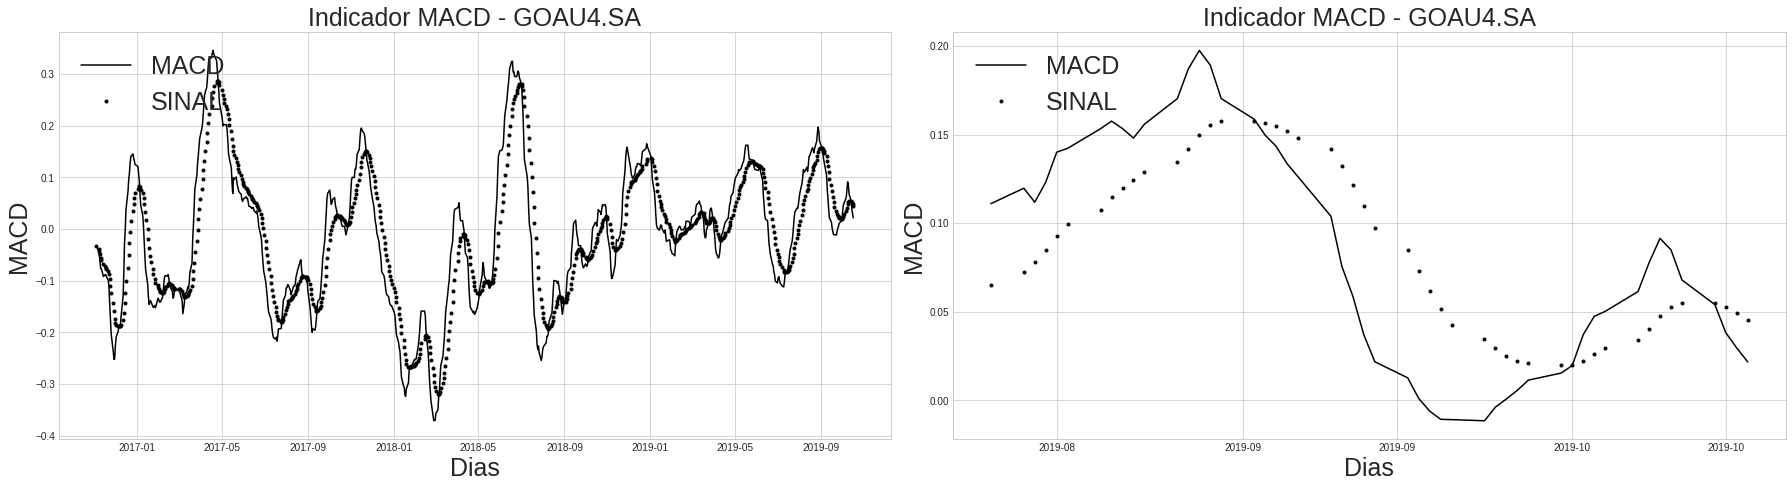

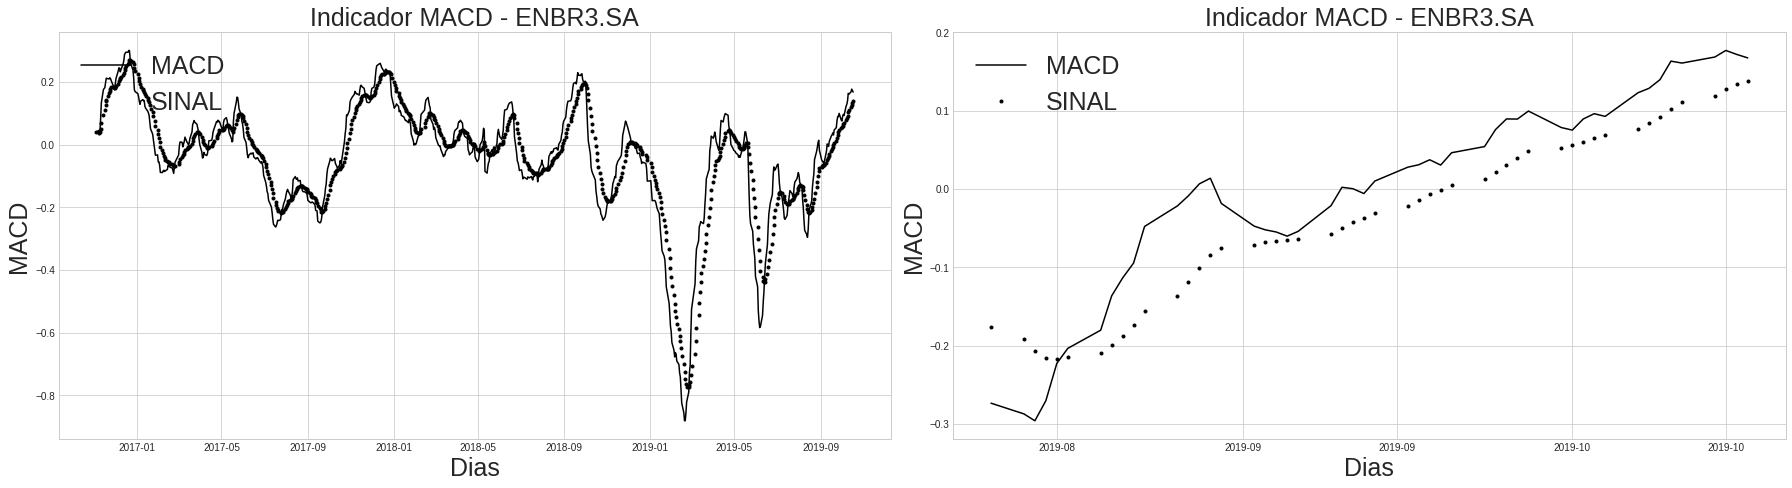

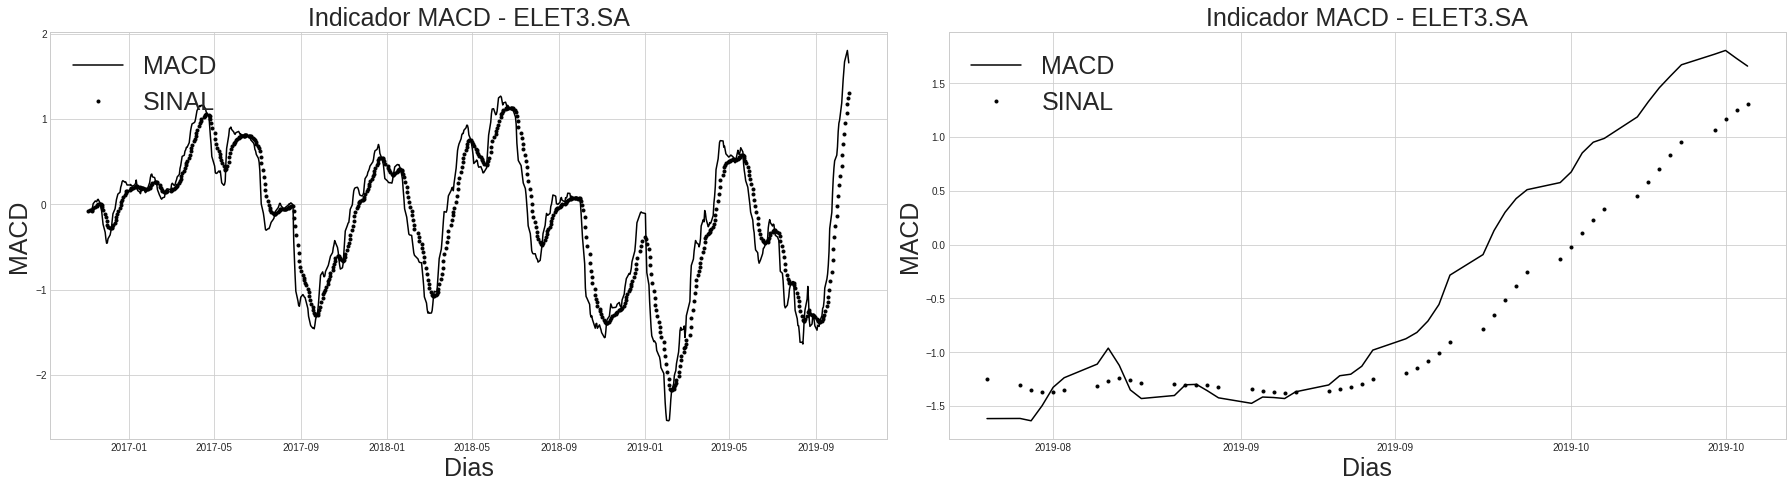

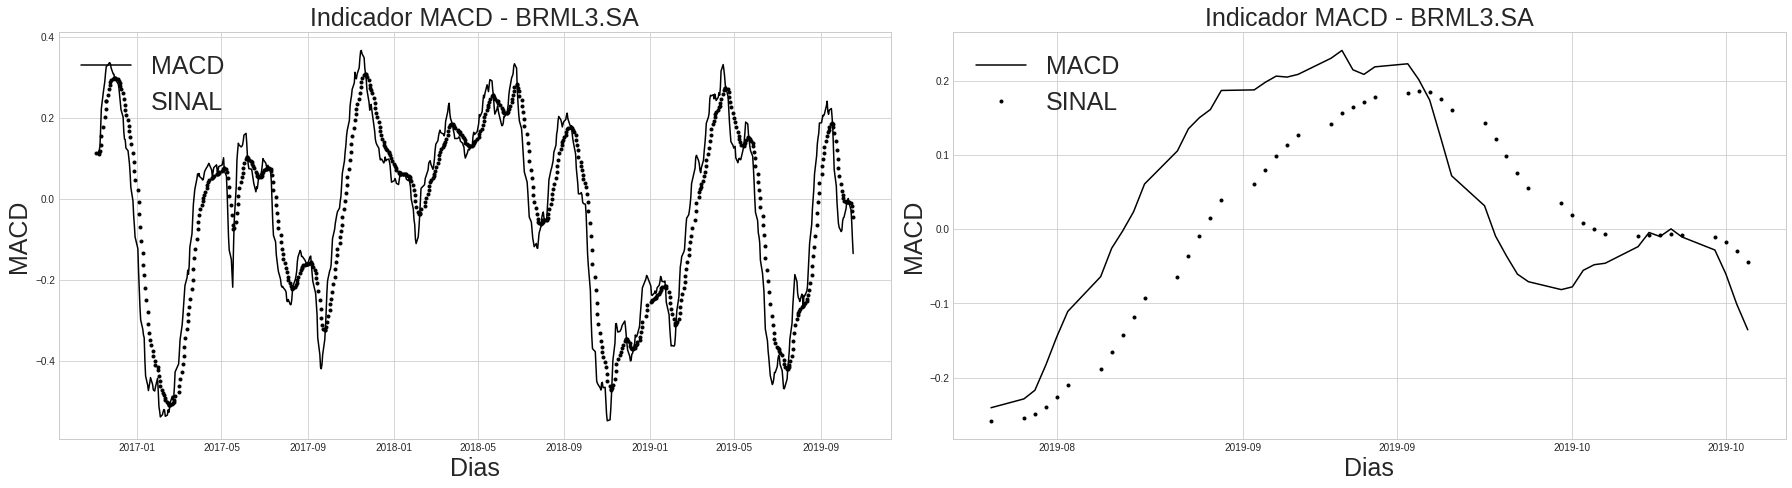

In [65]:
for ticker in ticker_list:
    trades = pd.DataFrame()
    trades['Close']= close_values[ticker]
    macd(trades, period_long=7, period_short=14, period_signal=6)
    # Sinal de Entrada
    trades['signal']=0
    trades['signal'] = np.where(trades['macd_val'] > trades['macd_signal_line'], 1.0, 0.0)   

    # Posição dos trades
    trades['positions'] = trades['signal'].diff()

    fig = plt.subplots(figsize=(25,25))
    plt.style.use('seaborn-whitegrid')


    ax1 = plt.subplot(427)
    ax1.plot(trades['macd_val'], 'k', label = 'MACD')
    ax1.plot(trades['macd_signal_line'], 'k.', label = 'SINAL')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.legend(loc='upper left',fontsize=25)

    ax1.set_xlabel("Dias",fontsize=25)
    ax1.set_ylabel('MACD',fontsize=25)
    ax1.set_title('Indicador MACD - ' + ticker,fontsize=25) 

    ax2 = plt.subplot(428)
    ax2.plot(trades['macd_val'][-100:], 'k', label = 'MACD')
    ax2.plot(trades['macd_signal_line'][-50:], 'k.', label = 'SINAL')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.legend(loc='upper left',fontsize=25)

    ax2.set_xlabel("Dias",fontsize=25)
    ax2.set_ylabel('MACD',fontsize=25)
    ax2.set_title('Indicador MACD - ' + ticker,fontsize=25)
    plt.tight_layout() 

<div id="Tópico 2">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 3:</h></a></h> Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex . Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.  
</div> </div> 

In [3]:
a=1

<div id="Tópico 3">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 4: </h></a></h>Compare os resultados das três estrategias de trades, quanto: a) Retorno de Capital, b) Número de Trades, c) Taxa de Acertos, d) Fator de Lucro, e) Índice Sharpe e o f) retorno dos ativos avaliados na condição buy&hold.   
</div> </div> 

In [4]:
a=1